<a href="https://colab.research.google.com/github/Qukoyk/eyeTrackerRelated/blob/main/%E5%9B%9E%E8%A7%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tobii Pro Lab raw data文件兴趣区组间回视分析示例程序

通过raw data文件中 AOI Tag 一栏，生成一览图和回视次数

| 功能 | 状态 |
| ---: | :----: |
| 生成eventplot，辅助回视判读 | 完成 |
| 回视次数输出 | 回视标准未定 |

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


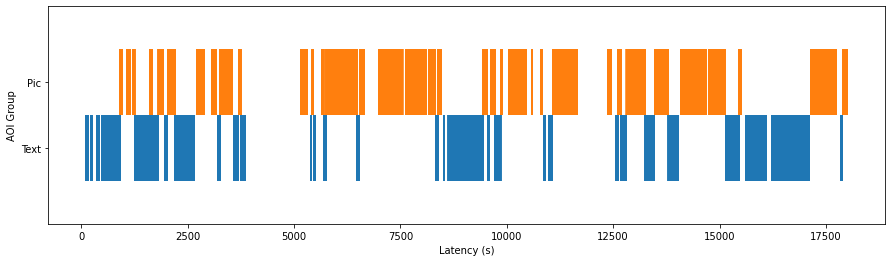

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
 
'''
 
回视.py
 
Tobii Pro Lab raw data文件兴趣区组间回视分析示例程序
·生成eventplot，辅助回视判读 完成
·回视次数输出 回视标准未定 待敲定
 
Created by: Ruoheng "Qukoyk" Qu from Noldus China
            2022/01/27
 
'''

import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# 指定画布尺寸，默认输出长图
plt.rcParams['figure.figsize'] = (15,4)


# 数据文件路径
# 本机
# dataFile = 'C:/Users/Qukoyk/Desktop/北师大 Data Export utf8.tsv'
# Google Colab
drive.mount('/content/drive')
dataFile = '/content/drive/My Drive/北师大 Data Export.tsv'

# 读取raw data中AOI Tag一列
df = pd.read_csv(dataFile,sep='\t')['内容']
# 筛出文字和图片区
dfText = df[df == '文字'].index.tolist()
dfPic = df[df == '图片'].index.tolist()
# 组合
listAll = [dfText, dfPic]

# # 输出回视次数
# noNan = df.dropna()
# noNanList = noNan.values.tolist()
# idxList = []
# idxList = noNan.index
# with open(dataFile) as myFile:
#     fileReader = csv.reader(myFile, delimiter='t')
#     for row in fileReader:
#         print(row)

# counter = 0
# resultCounter = 0
# listLen = len(noNanList)

# for i in noNanList:
#     if noNanList[counter+1] != i:
#         resultCounter = resultCounter + 1
#     if counter < listLen-2:
#         counter = counter + 1

# print(resultCounter/2)


# 作图相关
lineoffsets1 = [0, 1]
colors1 = ['C{}'.format(i) for i in range(2)]
ax = plt.gca()
ax.set_yticks(lineoffsets1)
ax.set_yticklabels(['Text','Pic'])
plt.xlabel('Latency (s)')
plt.ylabel('AOI Group')
plt.eventplot(listAll,colors=colors1)
plt.show()
